# Classification example

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

!['Mnist'](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## Import Data

In [10]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata
try:
   mnist = fetch_mldata('MNIST original')
except urllib.error.HTTPError as ex:
   print("Could not download MNIST data from mldata.org, trying alternative...")

   # Alternative method to load MNIST, if mldata.org is down
   from scipy.io import loadmat
   mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
   mnist_path = "./mnist-original.mat"
   response = urllib.request.urlopen(mnist_alternative_url)
   with open(mnist_path, "wb") as f:
       content = response.read()
       f.write(content)
   mnist_raw = loadmat(mnist_path)
   mnist = {
       "data": mnist_raw["data"].T,
       "target": mnist_raw["label"][0],
       "COL_NAMES": ["label", "data"],
       "DESCR": "mldata.org dataset: mnist-original",
   }
   print("Success!")

Could not download MNIST data from mldata.org, trying alternative...
Success!


In [11]:
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')

In [15]:
print(mnist['DESCR'])

mldata.org dataset: mnist-original


In [16]:
X = mnist['data'].astype('float64')
y = mnist['target']

## Split Data

In [17]:
from sklearn.model_selection import train_test_split

In [21]:
X, y = mnist['data'] / 255., mnist['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Model training

In [22]:
from sklearn.neural_network import MLPClassifier

In [42]:
model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=40, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.2)

# Train the model using the training sets
model.fit(X_train, y_train)

Iteration 1, loss = 0.28417157
Iteration 2, loss = 0.13303536
Iteration 3, loss = 0.10237198
Iteration 4, loss = 0.08602039
Iteration 5, loss = 0.07189298
Iteration 6, loss = 0.06469611
Iteration 7, loss = 0.05904892
Iteration 8, loss = 0.05344324
Iteration 9, loss = 0.04753907
Iteration 10, loss = 0.04614880
Iteration 11, loss = 0.04083644
Iteration 12, loss = 0.03550148
Iteration 13, loss = 0.03387414
Iteration 14, loss = 0.03090194
Iteration 15, loss = 0.02856278
Iteration 16, loss = 0.02572351
Iteration 17, loss = 0.02264491
Iteration 18, loss = 0.02093152
Iteration 19, loss = 0.02162582
Iteration 20, loss = 0.01709320
Iteration 21, loss = 0.01698923
Iteration 22, loss = 0.01645038
Iteration 23, loss = 0.01451319
Iteration 24, loss = 0.01406388
Iteration 25, loss = 0.01256129
Iteration 26, loss = 0.01261661
Iteration 27, loss = 0.00781718
Iteration 28, loss = 0.01098006
Iteration 29, loss = 0.01021014
Iteration 30, loss = 0.00764591
Iteration 31, loss = 0.00614756
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.2, max_iter=40, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

## Test and Evaluate

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
# Make predictions using the testing set
y_predictions = model.predict(X_test)

# Metrics
print('Confusion matrix')
print(confusion_matrix(y_test, y_predictions))

print('\nclassification report')
print(classification_report(y_test, y_predictions))

Confusion matrix
[[1323    0    4    0    1    3    8    0    4    6]
 [   0 1564    7    4    0    0    1    3    0    2]
 [   6    9 1357    7    1    0    4    5   11    0]
 [   1    0   19 1387    0   11    1    6    7    2]
 [   2    2    8    0 1277    0    3    6    2   28]
 [   5    2    1   22    1 1217   14    0   15    9]
 [   9    3    5    0    6    2 1378    0    4    0]
 [   2    2    5    6    4    1    0 1431    3   22]
 [   6   11    5   18    2    8    7    1 1325    8]
 [   3    2    2   12   11    3    0    8   11 1296]]

classification report
             precision    recall  f1-score   support

        0.0       0.97      0.98      0.98      1349
        1.0       0.98      0.99      0.98      1581
        2.0       0.96      0.97      0.96      1400
        3.0       0.95      0.97      0.96      1434
        4.0       0.98      0.96      0.97      1328
        5.0       0.98      0.95      0.96      1286
        6.0       0.97      0.98      0.98      1407
    

## Explore classifier

In [36]:
import matplotlib.pyplot as plt

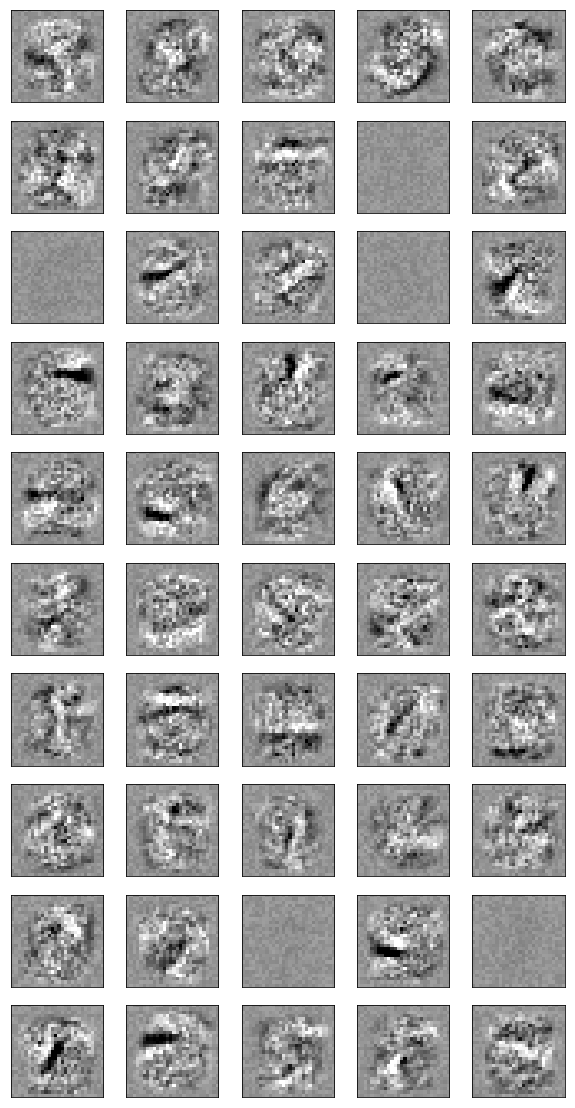

In [37]:
fig, axes = plt.subplots(10, 5,figsize=(10,20))
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = model.coefs_[0].min(), model.coefs_[0].max()
for coef, ax in zip(model.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()


## Exercise

1. How would you implement crossvalidation? search and try!
2. Can you use another model for this classification? try another one (SVM).

In [13]:
from sklearn.svm import SVC
model = SVC()

model.fit(X_train, y_train)

# Make predictions using the testing set
y_predictions = model.predict(X_test)

# Metrics
print('Confusion matrix')
print(confusion_matrix(y_test, y_predictions))

print('\nclassification report')
print(classification_report(y_test, y_predictions))

Confusion matrix
[[1313    0    7    2    4    5    5    1    9    3]
 [   0 1554    9    3    1    5    1    1    4    3]
 [   8   12 1296    7   16    9   15   13   19    5]
 [   3    3   21 1326    0   41    3   10   22    5]
 [   2    3    4    0 1275    1    2    5    3   33]
 [   6    8    5   39   12 1173   22    1   15    5]
 [  11    1   11    0    6    8 1366    0    4    0]
 [   4    7   14    4   17    3    1 1394    2   30]
 [   2   24   13   15    9   25    8    3 1278   14]
 [   9    5    8   22   41   10    0   32   11 1210]]

classification report
             precision    recall  f1-score   support

        0.0       0.97      0.97      0.97      1349
        1.0       0.96      0.98      0.97      1581
        2.0       0.93      0.93      0.93      1400
        3.0       0.94      0.92      0.93      1434
        4.0       0.92      0.96      0.94      1328
        5.0       0.92      0.91      0.91      1286
        6.0       0.96      0.97      0.97      1407
    